# Fake News Classification

### Data- Description

There are 6 columns in the dataset:

- id:  Unique id of each news article
- headline:  It is the title of the news.
- news:  It contains the full text of the news article
- Unnamed:0:  It is a serial number
- written_by:  It represents the author of the news article
- label:  It tells whether the news is fake (1) or not fake (0).

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display the entire data
pd.set_option('display.max_colwidth', -1)

In [3]:
# Reading train dataset
df=pd.read_csv(r'C:\Users\awast\Desktop\Fake news project/train_news.csv')
df

Unnamed: 0     id  \
0      0           9653    
1      1           10041   
2      2           19113   
3      3           6868    
4      4           7596    
...   ..            ...    
20795  20795       5671    
20796  20796       14831   
20797  20797       18142   
20798  20798       12139   
20799  20799       15660   

                                                                                                   headline  \
0      Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times                   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times                               
2      Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart   
3      Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times   
4      A Digital 9/11 If Trump Wins                                                                           
...                             ...                                                                           
20795  NaN                                                                                                    
20796  Albert Pike and the European Migrant Crisis                                                            
20797  Dakota Access Caught Infiltrating Protests to Incite Violence, Funding Trolls Online                   
20798  How to Stretch the Summer Solstice - The New York Times                                                
20799  Emory University to Pay for ’100 Percent’ of Undocumented Students’ Financial Aid - Breitbart          

                       written_by  \
0      Eric Lipton and Steve Eder   
1      David Waldstein              
2      Pam Key                      
3      Jess Bidgood                 
4      Finian Cunningham            
...                  ...            
20795  NeverSurrender               
20796  Rixon Stewart                
20797  Eddy Lavine                  
20798  Alison S. Cohn               
20799  Tom Ciccotta                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [4]:
# Checking for null values 
df.isnull().sum() 

Unnamed: 0    0   
id            0   
headline      558 
written_by    1957
news          39  
label         0   
dtype: int64

There are 558 null values in headline, 1957 null values in written_by and 39 null values in news which needs to be treated for a more accurate result 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


From the above information we can derive that there 3 integer type variables (Unnamed, id, headline) and 3 object type variables (written_by, news, label).

In [6]:
df['headline'].fillna('No Headline',inplace=True)

In [7]:
# Dropping Written_by column as there are many null values
df.drop(['written_by'],axis=1,inplace=True)

In [8]:
# Dropping the null news values as we are working on analyzing the fake news so news hence it makes sence to drop it
df = df.dropna(axis=0, subset=['news'])

In [9]:
df['news'].count()

20761

In [10]:
df.isnull().sum()

Unnamed: 0    0
id            0
headline      0
news          0
label         0
dtype: int64

In [11]:
df=df.drop(['Unnamed: 0','id'],axis=1)

In [ ]:
#Lets delete 'Unnamed column' and 'id' columns . These columns does not have any impact on target variable

### EDA

In [12]:
df['label'].value_counts()

0    10387
1    10374
Name: label, dtype: int64

It can be seen that the dataset is well balanced

<AxesSubplot:xlabel='label', ylabel='count'>

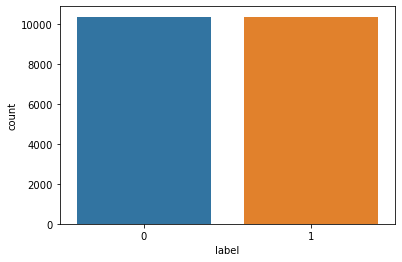

In [13]:
sns.countplot(data=df,x='label')

In [14]:
df['headline_length'] = [len(str(a)) for a in df['headline']]
df['headline_length'].describe()

count    20761.000000
mean     72.574924   
std      25.011968   
min      3.000000    
25%      59.000000   
50%      75.000000   
75%      87.000000   
max      456.000000  
Name: headline_length, dtype: float64

In [15]:
df['news_length'] = [len(str(a)) for a in df['news']]
df['news_length'].describe()

count    20761.000000 
mean     4552.715380  
std      5130.563491  
min      1.000000     
25%      1628.000000  
50%      3361.000000  
75%      6275.000000  
max      142961.000000
Name: news_length, dtype: float64

In [17]:
# Merging the Headlines and news
df['Full_News'] = df[['headline', 'news']].apply(lambda x: ' '.join(x), axis = 1)

In [18]:
# Importing more important libraries

from nltk.corpus import wordnet
import string
import nltk
import ast
import re
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.corpus import sentiwordnet

In [19]:
## Cleaining the text
from nltk.corpus import wordnet

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
stemmer = PorterStemmer() 

In [22]:
def clean_text(text):
    text=str(text)
    text = text.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    rem_num = re.sub('[0-9]+', '', text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [23]:
df["Full_News"] = df["news"].apply(lambda x: clean_text(x))

In [25]:
# Most frequent words counter    
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

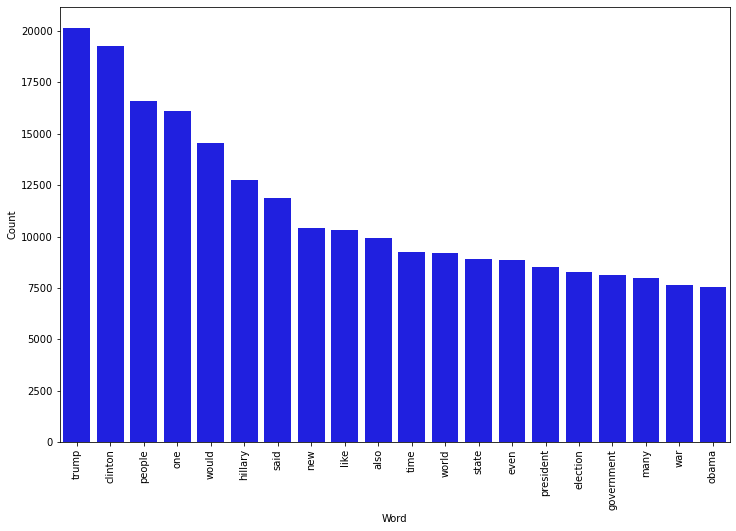

In [26]:
# Most frequent words in fake news
counter(df[df["label"] == 1], "Full_News", 20)

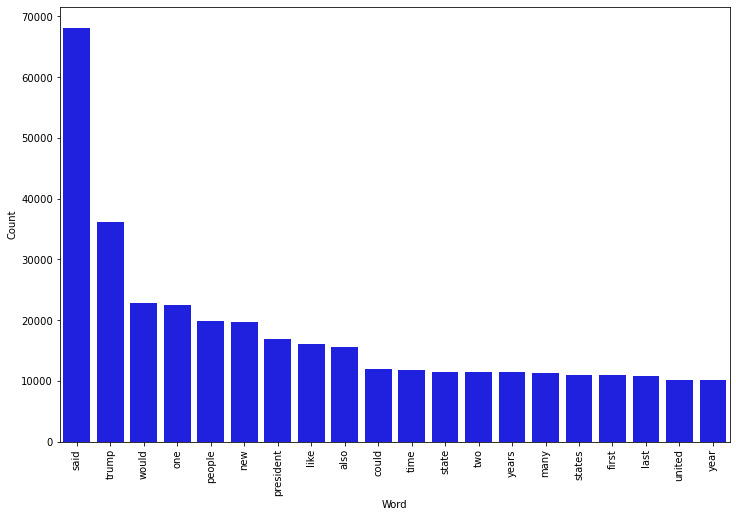

In [27]:
# Most frequent words in genuine news
counter(df[df["label"] == 0], "Full_News", 20)

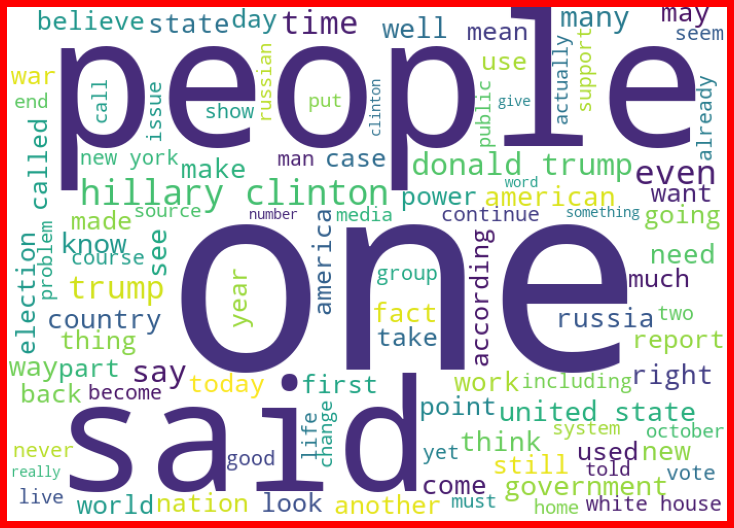

In [31]:
from wordcloud import WordCloud


fake = df['Full_News'][df['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

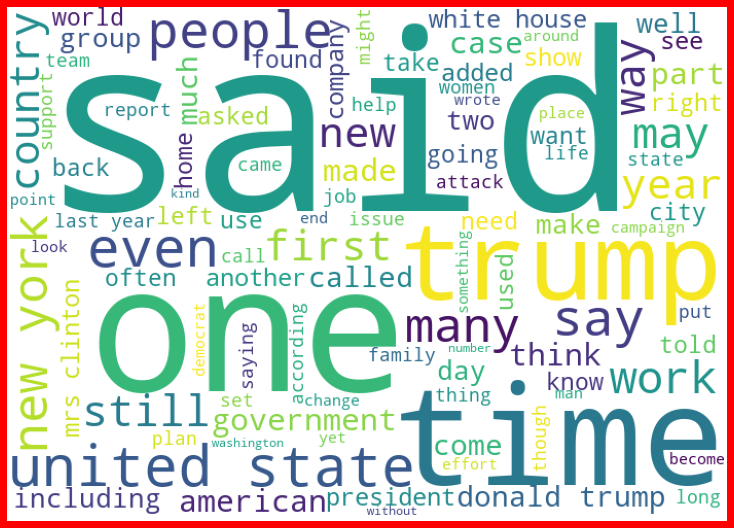

In [32]:
from wordcloud import WordCloud


Real = df['Full_News'][df['label']==0]

Real_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(Real))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
tf_vec=TfidfVectorizer(max_features=5000)
features=tf_vec.fit_transform(df['news'])
x=features
y=df['label']

In [34]:
tf_vec.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '11',
 '12',
 '125',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1960s',
 '1970s',
 '1980',
 '1980s',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '58',
 '59',
 '60',
 '600',
 '65',
 '70',
 '700',
 '75',
 '80',
 '800',
 '85',
 '8th',
 '90',
 '95',
 '99',
 '_____',
 'aaron',
 'abandoned',
 'abc',
 'abe',
 'abedin',
 'ability',
 'able',
 'abortion',
 'about',
 'above',
 'abroad',
 'absence',
 'absolu

## Model Training 

In [35]:
#train and predict
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [36]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((16608, 5000), (16608,), (4153, 5000), (4153,))

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('logistc regression metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

logistc regression metrics::::::::::::
accuracy score:::::::::::::: 0.9496749337828077
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2076
           1       0.95      0.95      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

confusion matrix ::::::::::::::
 [[1965  111]
 [  98 1979]]


In [39]:
mn_nb=MultinomialNB()
mn_nb.fit(x_train,y_train)
y_pred=mn_nb.predict(x_test)
print('Multinomial NB metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

Multinomial NB metrics::::::::::::
accuracy score:::::::::::::: 0.8926077534312545
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      2076
           1       0.92      0.86      0.89      2077

    accuracy                           0.89      4153
   macro avg       0.89      0.89      0.89      4153
weighted avg       0.89      0.89      0.89      4153

confusion matrix ::::::::::::::
 [[1917  159]
 [ 287 1790]]


In [40]:
gs_nb=GaussianNB()
gs_nb.fit(x_train.toarray(),y_train)
y_pred=gs_nb.predict(x_test.toarray())
print('Gaussian NB metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

Gaussian NB metrics::::::::::::
accuracy score:::::::::::::: 0.8598603419215025
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      2076
           1       0.89      0.82      0.85      2077

    accuracy                           0.86      4153
   macro avg       0.86      0.86      0.86      4153
weighted avg       0.86      0.86      0.86      4153

confusion matrix ::::::::::::::
 [[1866  210]
 [ 372 1705]]


In [41]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
y_pred=d_tree.predict(x_test)
print('DecisionTreeClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

DecisionTreeClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.8839393209727907
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      2076
           1       0.88      0.89      0.88      2077

    accuracy                           0.88      4153
   macro avg       0.88      0.88      0.88      4153
weighted avg       0.88      0.88      0.88      4153

confusion matrix ::::::::::::::
 [[1823  253]
 [ 229 1848]]


In [42]:
rf_=RandomForestClassifier()
rf_.fit(x_train,y_train)
y_pred=rf_.predict(x_test)
print('RandomForestClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

RandomForestClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9472670358776788
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2076
           1       0.95      0.95      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

confusion matrix ::::::::::::::
 [[1968  108]
 [ 111 1966]]


In [43]:
kneighbor=KNeighborsClassifier()
kneighbor.fit(x_train,y_train)
y_pred=kneighbor.predict(x_test)
print('KNeighborsClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

KNeighborsClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.781362870214303
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.91      0.63      0.74      2076
           1       0.72      0.94      0.81      2077

    accuracy                           0.78      4153
   macro avg       0.81      0.78      0.78      4153
weighted avg       0.81      0.78      0.78      4153

confusion matrix ::::::::::::::
 [[1302  774]
 [ 134 1943]]


In [45]:
import sklearn
sgd=sklearn.linear_model.SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print('SGDClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

SGDClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9535275704310138
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2076
           1       0.94      0.96      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

confusion matrix ::::::::::::::
 [[1959  117]
 [  76 2001]]


In [46]:
perceptron=sklearn.linear_model.Perceptron()
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
print('perceptron metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

perceptron metrics::::::::::::
accuracy score:::::::::::::: 0.9470262460871659
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2076
           1       0.93      0.96      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

confusion matrix ::::::::::::::
 [[1937  139]
 [  81 1996]]


In [47]:
pac=sklearn.linear_model.PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
y_pred=pac.predict(x_test)
print('PassiveAggressiveClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

PassiveAggressiveClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9494341439922948
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2076
           1       0.95      0.95      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

confusion matrix ::::::::::::::
 [[1977   99]
 [ 111 1966]]


### Hyperparameter Tuning

Logistic regression and sgdclassifier working better hence fine tune the model using hyper parameter

In [48]:
# Logistic regression
parameters={'penalty':['l1','l2', 'elasticnet', 'none'],'multi_class':['auto', 'ovr', 'multinomial'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[1.0,1.5,2.0]}
grid_cv=sklearn.model_selection.GridSearchCV(lr,parameters)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_

{'C': 2.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [49]:
# sgdclassifier
parameters={'loss':['log', 'modified_huber', 'squared_hinge', 'perceptron'],'penalty':['l2', 'l1', 'elasticnet'],'alpha':[0.01,0.001,0.0001]}
grid_cv=sklearn.model_selection.GridSearchCV(sgd,parameters)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_

{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l2'}

In [50]:
sgd=sklearn.linear_model.SGDClassifier(alpha=0.0001,loss='modified_huber',penalty='l2')
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print('SGDClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

SGDClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9588249458222972
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2076
           1       0.96      0.95      0.96      2077

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153

confusion matrix ::::::::::::::
 [[2003   73]
 [  98 1979]]


In [51]:
lr=LogisticRegression(C= 2.0, multi_class= 'auto', penalty= 'l1', solver= 'saga')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('logistc regression metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

logistc regression metrics::::::::::::
accuracy score:::::::::::::: 0.9600288947748615
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2076
           1       0.96      0.96      0.96      2077

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153

confusion matrix ::::::::::::::
 [[1987   89]
 [  77 2000]]


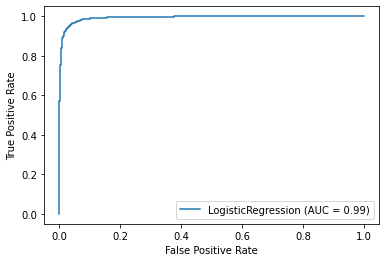

In [52]:
sklearn.metrics.plot_roc_curve(lr, x_test, y_test) 
plt.show()

In [53]:
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.9600281967006289